# Assignment 1

1. **Thiết lập mô hình toán học tổng quát của các xung:**
    
    + Xung vuông (square wave)
    
    + Xung tam giác (triangle wave)
    
    + Xung răng cưa (sawtooth wave)
    
    + Xung chuỗi (pules train)
    
    Bằng mô hình chuỗi Fourier với tần số f = 1000*sin(2*pi/49*N) N: Số thứ tự của sinh viên 
    
2. **Viết code để thực hiện vẽ các xung đã thiết lập mô hình toán học:**
    
    + khảo sát với 1000 sóng?
    
    + khảo sát với góc pha phi=2*pi/N?
    
    + Tìm biên độ của xung?
    
    + Vẽ thống kê biên độ của hàm tổng hợp (các xung) theo tổng số sóng thành phần chạy từ 100 đến 1000?

## Mô hình toán học

1. **Xung vuông (Square Wave):**
- General formula:
    
    $$
    x(t) = \frac{4 V}{\pi} \sum_{n=1,3,5...}^{\infty} \frac{1}{n} \cos(n \omega t + \phi_n) \\=  \frac{4V}{\pi} \sum_{m=0}^{\infty} \frac{1}{2m + 1} \cos((2m+1) \omega t + \phi_{2m+1})
    $$
    
    where ($\omega = 2\pi f, V = amplitude, \phi_n = n \phi_0$)

2. **Xung tam giác (Triangle Wave):**
    
    $$
    x(t) = \frac{8}{\pi^2} \sum_{n=1,3,5...}^{\infty} \frac{(-1)^{\frac{n-1}{2}}}{n^2} \sin(n \omega t)x(t)
    $$

3. **Xung răng cưa (Sawtooth wave)**:
   $$  f(t) = \frac{2}{\pi} \sum_{k=1}^{\infty} \frac{(-1)^{k+1}\sin(2\pi kft)}{k} = \frac{2}{\pi} \sum_{k=1}^{\infty} \frac{(-1)^{k+1}\sin(1.2\pi kt)}{k} $$

4. **Xung chuỗi (Pulse train)**:
$$
\text{pulse\_train}(t, N, \phi, \tau, T) = \sum_{n=-N}^{N} \sin(2 \pi n f t + \phi) \cdot \text{sinc}(n \tau f)
$$

Params:
- $t$: Time variable.
- $N$: Number of harmonics.
- $\phi$: Phase shift.
- $\tau$: Pulse width.
- $T$: Period of the pulse train.
- $f$: Frequency of the pulse train (not provided in your code but necessary for the formula).


## Code practice

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## CONSTANTS
N = 27 # id number

f = abs(1000 * np.sin( (2 * np.pi / 49) * N)) # Frequency
phi = 2 * np.pi / N # Phase
A = 1 # amplitude


num_components = 1000  # 1000 component waves
sample_rate = 1000 # sample rate
time_interval = 10 * 1/f
time = np.linspace(0, time_interval, sample_rate)  # 3 period

print(
    f'\n Amplitude: {A}',
    f'\n Frequency: {f}',
    f'\n Init Phase: {phi}',
)


 Amplitude: 1 
 Frequency: 315.1082180236202 
 Init Phase: 0.23271056693257727


### 1. Square wave


 SQUARE WAVE

Amplitude with 1000 components: 1.0003183086253629


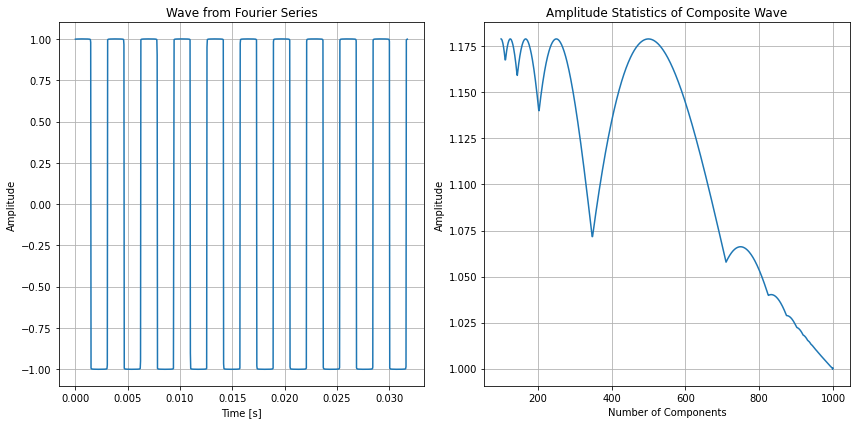

In [7]:
def square_wave(time=time, f=f, phi=phi, num_components=1000):
    # Initialize the square wave signal
    square_wave = np.zeros_like(time)

    # Calculate the Fourier series approximation
    for n in range(1, 2*num_components, 2):
        square_wave += (4*A/np.pi) * (1/n) * np.sin((2 * np.pi * f) * n * time + phi * n)

    return square_wave

def plot_and_stats(in_func) -> None:
    """
    Plot input function, find amplitude and survey amplitude wave 
    as changing num_components
    params:
        in_func: input function,

    return: None
    """

    in_func1000 = in_func()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot
    axes[0].plot(time, in_func1000, label='Square Wave')
    axes[0].set_title('Wave from Fourier Series')
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True)

    ##### amplitude STATS
    def find_amplitude(wave):
        return np.max(wave)

    print(f'\nAmplitude with 1000 components: {find_amplitude(in_func1000)}')


    # Amplitude statistic of sum function as 
    # the number of components change for 100 to 1000?
    amplitudes = [find_amplitude(in_func(num_components=n)) for n in range(100, 1001, 1)]
    components = list(range(100, 1001, 1))

    axes[1].plot(components, amplitudes)
    axes[1].set_title('Amplitude Statistics of Composite Wave')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('Amplitude')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

print('\n SQUARE WAVE')
plot_and_stats(square_wave)

### 2. Triangle wave


Amplitude with 1000 components: 0.999125514558137


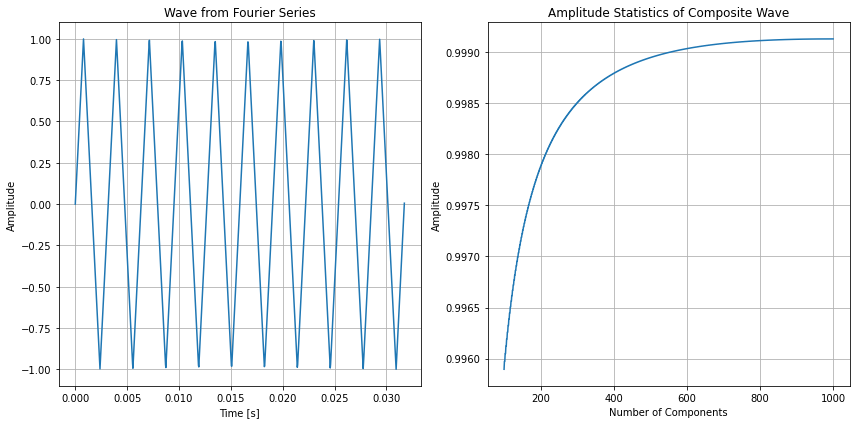

In [8]:
def triangle_wave(time=time, f=f, phi=phi, num_components=1000):
    return (8 / np.pi**2) * sum(
                                (-1)**((k-1)//2) *
                                np.sin(2 * np.pi * k * f * time + time * phi) / k**2 
                                for k in range(1, num_components+1, 2)
                                )

plot_and_stats(triangle_wave)

### 3. Sawtooth wave


Amplitude with 1000 components: 1.151891184982638


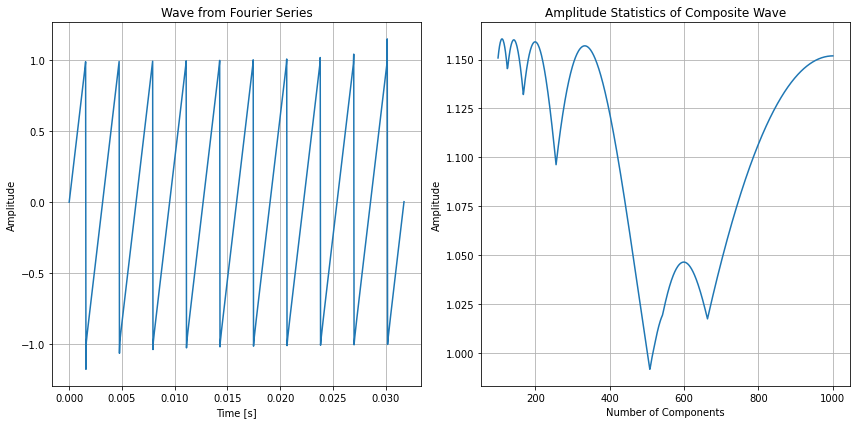

In [9]:
def sawtooth_wave(time=time, f=f, phi=phi, num_components=1000):
    return (2 / np.pi) * sum(
                            (-1)**(k+1) *
                            np.sin(2 * np.pi * k * f * time + phi * time) / k
                            for k in range(1, num_components+1)
                            )

plot_and_stats(sawtooth_wave)

### 4. Pulse train


Amplitude with 1000 components: 0.23457668261807654


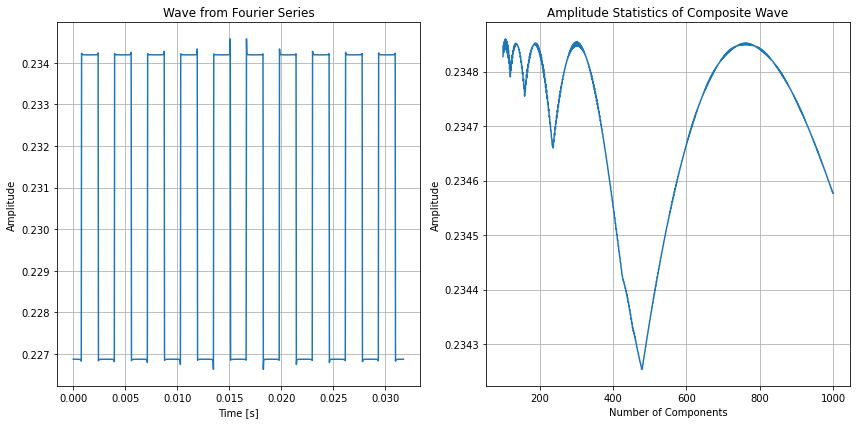

In [10]:
tau = 0.1  # pulse width
def pulse_train(t=time, phi=phi, tau=tau, f=f, num_components=1000):
    return sum(np.sin(2 * np.pi * n * f * t + phi) *
                np.sinc(n * tau * f) for n in range(-num_components, num_components+1))

plot_and_stats(pulse_train)


# Assignment 2

2.1

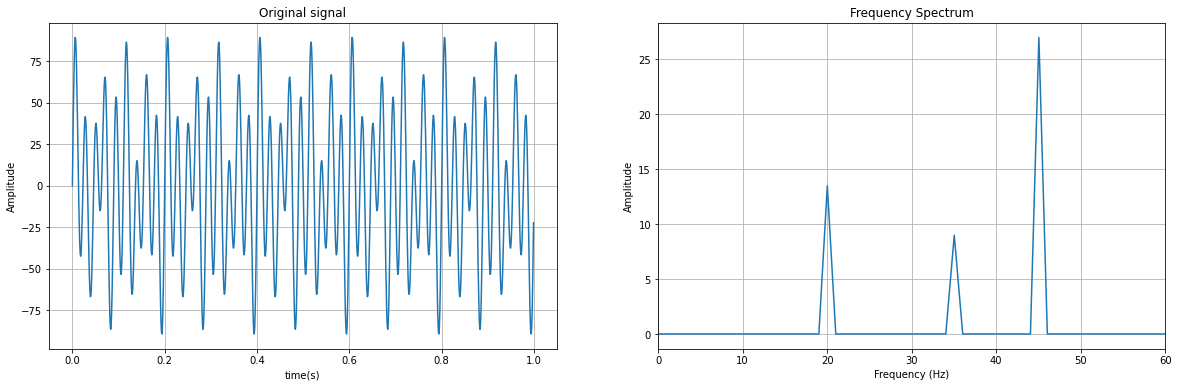

In [12]:
# t = time
t = [i / 1000 for i in range(1000)]  # 1000 points from 0 to 1 second
# our signal: y= N\sin(2\pi20t) + 2/3N\sin(2\pi35t)+2N\sin(2\pi45t)
y = [N * np.sin(2*np.pi * 20*t_step) + 2/3*N * np.sin(2*np.pi * 35*t_step) + 2*N * np.sin(2*np.pi * 45*t_step) for t_step in t]

# DFT transform function
def _dft(signal):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal signal
    """
    N = len(signal)

    # complex part
    n = np.arange(N) # 1xN
    k = n.reshape((N, 1)) # Nx1
    e = np.exp(-2j * np.pi * k * n / N)
    
    output = np.dot(e, signal)
    
    return output


# Compute the Discrete Fourier Transform (DFT)
y_dft = _dft(y)

# Compute frequency values
freqs = [k / (t[-1] - t[0]) for k in range(len(y_dft))]

# Compute magnitude spectrum
magnitude = [abs(x) / len(t) for x in y_dft]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# original signal
axes[0].plot(t, y)
axes[0].set_title('Original signal')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

axes[1].plot(freqs, magnitude)
axes[1].set_title('Frequency Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlim(0, 60)  # Set the x-axis limit from 0 to 60 Hz
axes[1].grid(True)
plt.show()

2.2

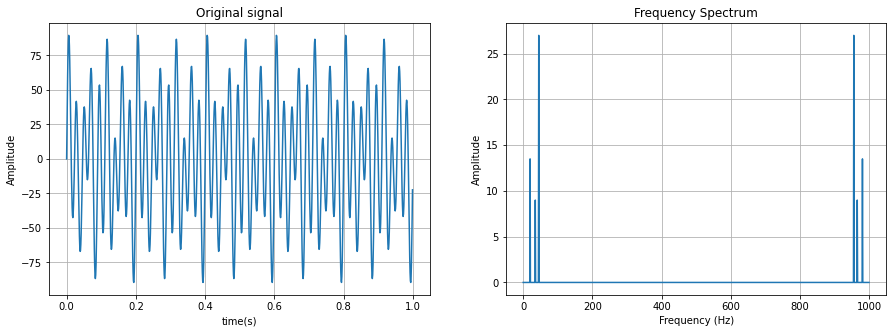

In [22]:
def dft_and_plot(in_signal, time_array=time, Fs=f):
    """
    Apply discrete fourier transform to input function and then plot
    params:
        - in_signal: input signal
        - time_array:  a time vector of time interval
        - Fs: Sampling frequency
        - L: Length of the signal (number of samples)
    """

    # DFT transform function
    def _dft(signal):
        """
        Function to calculate the 
        discrete Fourier Transform 
        of a 1D real-valued signal signal
        """
        N = len(signal)

        # complex part
        n = np.arange(N) # 1xN
        k = n.reshape((N, 1)) # Nx1
        e = np.exp(-2j * np.pi * k * n / N)
        
        output = np.dot(e, signal)
        
        return output


    # Compute the Discrete Fourier Transform (DFT)
    y_dft = _dft(in_signal)

    # Compute frequency values
    freqs = [k / (time_array[-1] - time_array[0]) for k in range(len(y_dft))]

    # Compute magnitude spectrum
    magnitude = [abs(a) / len(t) for a in y_dft]

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # original signal
    axes[0].plot(time_array, in_signal)
    axes[0].set_title('Original signal')
    axes[0].set_xlabel('time(s)')
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True)

    axes[1].plot(freqs, magnitude)
    axes[1].set_title('Frequency Spectrum')
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Amplitude')
    # axes[1].set_xlim(0, 60)  # Set the x-axis limit from 0 to 60 Hz
    axes[1].grid(True)
    plt.show()


# t = time
t = [i / 1000 for i in range(1000)]  # 1000 points from 0 to 1 second
# our signal: y= N\sin(2\pi20t) + 2/3N\sin(2\pi35t)+2N\sin(2\pi45t)
y = [N * np.sin(2*np.pi * 20*t_step) + 2/3*N * np.sin(2*np.pi * 35*t_step) + 2*N * np.sin(2*np.pi * 45*t_step) for t_step in t]

dft_and_plot(y, t)

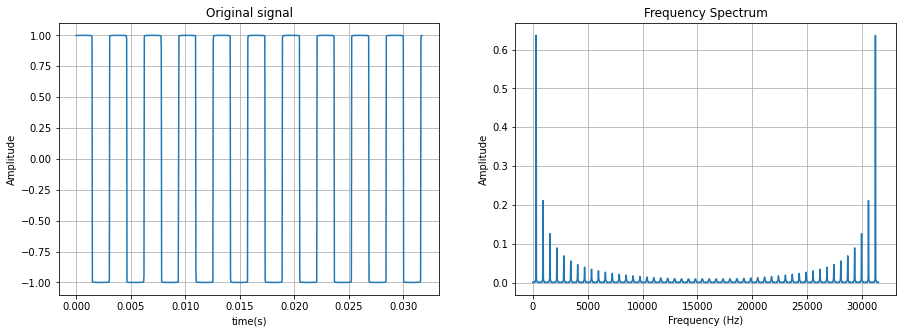

In [23]:
square_wave1000 = square_wave()
dft_and_plot(square_wave1000)

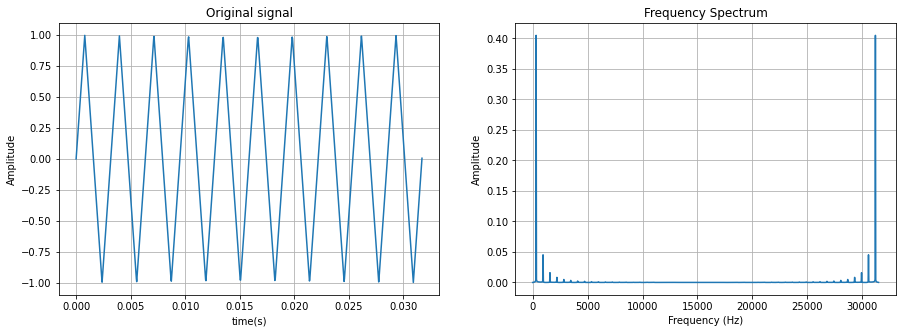

In [24]:
triangle_wave1000 = triangle_wave()
dft_and_plot(triangle_wave1000)

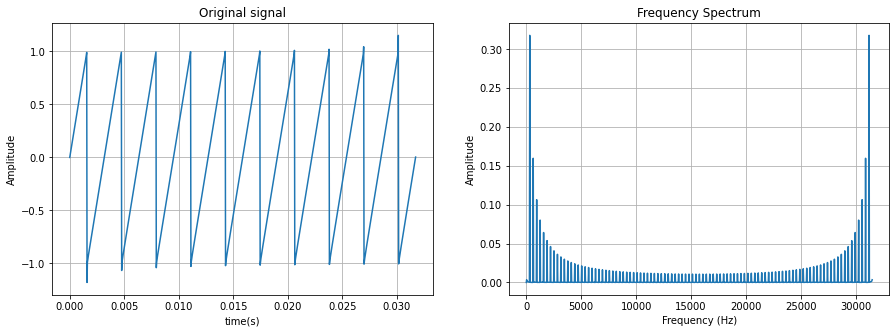

In [25]:
sawtooth_wave1000 = sawtooth_wave()
dft_and_plot(sawtooth_wave1000)

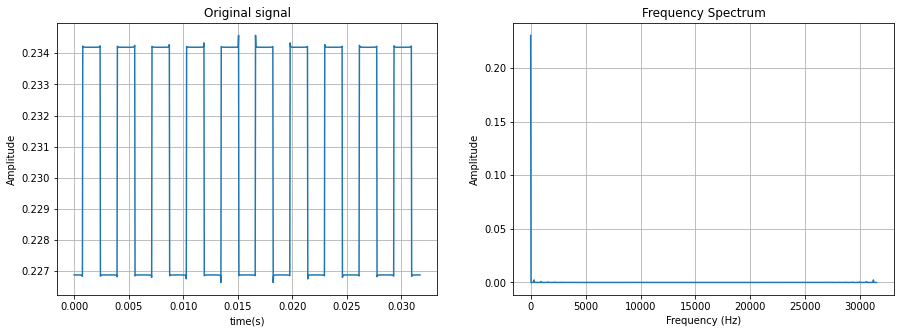

In [26]:
pulse_train1000 = pulse_train()
dft_and_plot(pulse_train1000)